<a href="https://colab.research.google.com/github/Amulya-B28/FutureIntern_AI_02/blob/main/imggen.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# SETUP

In [27]:
%pip install --quiet --upgrade diffusers transformers accelerate invisible_watermark mediapy omegaconf

In [28]:
!pip install omegaconf

#AKAN MERESTART RUNTIME, KLIK RESTART
#WILL RESTART RUNTIME, JUST CLICK RESTART

In [29]:
use_refiner = False

In [30]:
#@title Setup Model
# @markdown IF U WANT TO USE ANOTHER MODEL, GO TO [HERE](https://huggingface.co/models?pipeline_tag=text-to-image&sort=trending), MAKE SURE THE MODEL HAVE A SAFETENSORS FILE

import mediapy as media
import random
import sys
import torch

from diffusers import DiffusionPipeline

model = "Linaqruf/anything-v3.0" # @param ["digiplay/Realisian_v5", "stabilityai/stable-diffusion-xl-base-1.0", "hakurei/waifu-diffusion", "Linaqruf/anything-v3.0"]

pipe = DiffusionPipeline.from_pretrained(
    model,
    torch_dtype=torch.float16,
    safety_checker=None,
    requires_safety_checker=False
)

pipe = pipe.to("cuda")  # If you have a GPU for acceleration

unet/diffusion_pytorch_model.safetensors not found


Loading pipeline components...:   0%|          | 0/5 [00:00<?, ?it/s]

An error occurred while trying to fetch /root/.cache/huggingface/hub/models--Linaqruf--anything-v3.0/snapshots/8323d54dcf89c90c39995b04ae43166520e8992a/unet: Error no file named diffusion_pytorch_model.safetensors found in directory /root/.cache/huggingface/hub/models--Linaqruf--anything-v3.0/snapshots/8323d54dcf89c90c39995b04ae43166520e8992a/unet.
Defaulting to unsafe serialization. Pass `allow_pickle=False` to raise an error instead.
An error occurred while trying to fetch /root/.cache/huggingface/hub/models--Linaqruf--anything-v3.0/snapshots/8323d54dcf89c90c39995b04ae43166520e8992a/vae: Error no file named diffusion_pytorch_model.safetensors found in directory /root/.cache/huggingface/hub/models--Linaqruf--anything-v3.0/snapshots/8323d54dcf89c90c39995b04ae43166520e8992a/vae.
Defaulting to unsafe serialization. Pass `allow_pickle=False` to raise an error instead.


##**PROMPT**##

  0%|          | 0/50 [00:00<?, ?it/s]

Prompt:	LANDSCAPE
Seed:	4444496652


""

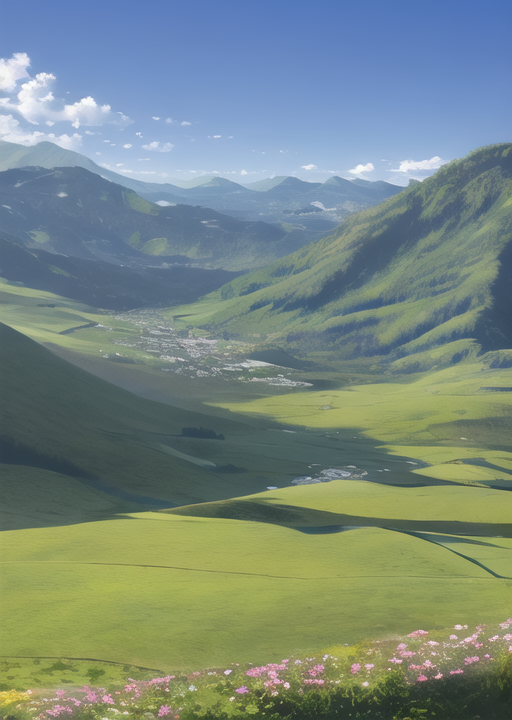

In [31]:
# @title PROMPT, GUNAKAN BAHASA INGGRIS / USE ENGLISH { display-mode: "form" }
import os
prompt = "LANDSCAPE" #@param {type:"string"}
seed = 4444496652 # @param {type:"slider", min:0, max:9000000000, step:1}

negative_prompt = "bad-picture-chill-75v, ng_deepnegative_v1_75t, badhandv4, (worst quality:2), (low quality:2), (normal quality:2), (lowres:2), (bad anatomy:2), (bad hands:2), (watermark:2), (mole:1.5), (freckles:1.5)" #@param {type:"string"}

width = 512  #@param {type:"slider", min:8, max:2048, step:8}
height = 720  #@param {type:"slider", min:8, max:2048, step:8}

# Mengambil nilai dari widget param
width = int(width)
height = int(height)

images = pipe(
    prompt=prompt,
    width=width,
    height=height,
    negative_prompt=negative_prompt,
    output_type="latent" if use_refiner else "pil",
    generator=torch.Generator().manual_seed(seed)
).images



if use_refiner:
  images = refiner(
      prompt = prompt,
      negative_prompt = negative_prompt,
      image = images,
      ).images

print(f"Prompt:\t{prompt}\nSeed:\t{seed}")

# Nama file yang akan digunakan
base_filename = "output.jpg"
new_filename = base_filename

# Cek apakah file dengan nama yang sama sudah ada
if os.path.exists(base_filename):
    # Jika sudah ada, tambahkan angka di belakangnya
    index = 1
    while True:
        new_filename = f"output_{index}.jpg"
        if not os.path.exists(new_filename):
            break
        index += 1

# Simpan gambar dengan nama yang telah ditentukan
images[0].save(new_filename)

# Menampilkan gambar
media.show_images(images)

## **TOOLS**

In [32]:
#@title FIX FALSE NSFW
pipe.safety_checker = None
pipe.requires_safety_checker = False

#JIKA RUNTIME RESTART, JALANKAN KODE INI LAGI
#IF THE RUNTIME RESTARTS, RUN THIS CODE AGAIN